In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

sns.set_theme(context="talk")    

daily_df=pd.read_csv("../data/wide_daily_scaledPer10k.csv")
daily_df.index=pd.to_datetime(daily_df['Date'])
daily_df.drop(columns=['Date'], inplace=True)


weekly_df=pd.read_csv("../data/wide_weekly_scaledPer10k.csv")
weekly_df=weekly_df.T
weekly_df.columns = weekly_df.iloc[0]
weekly_df = weekly_df.iloc[1:].reset_index(drop=True)


# Autocorrelations

In [5]:
# # do autocorr
# # each lag is a day so ~50 days is ~2 months
# maxlags=750
# numeric_cols = region_df.select_dtypes(include='number').columns
# fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(10, 3*len(numeric_cols)),sharex=True)

# for ax, col in zip(axes, numeric_cols):
#     x = region_df[col].dropna().values
#     x = x - x.mean()
#     # do auto correlation
#     acf = signal.correlate(x, x, mode='full')
#     # get just positive half (this function will get negative correlations)
#     acf = acf[len(acf)//2:len(acf)//2+maxlags]  
#     acf = acf / acf[0]       # lag 0 which should be the max

#     # plot lag 1 line and annotate
#     ax.axvline(x=30, color='red', linestyle='--')  # Add vertical line at lag 1
#     ax.annotate('1 month',  xy=(30,  plt.ylim()[1]*0.8), xytext=(35, plt.ylim()[1]*.90),  arrowprops=dict(arrowstyle='-|>', color='red'))

#     # plot 1 week line
#     ax.axvline(x=365, color='green', linestyle='--')  # Add vertical line at lag 1
#     ax.annotate('1 year',  xy=(365,  plt.ylim()[1]*0.8), xytext=(370, plt.ylim()[1]*.90),  arrowprops=dict(arrowstyle='-|>', color='green'))

#     ax.plot(acf)  # First 50 lags
#     ax.set_title(f'{col}')
#     ax.grid(True)
# fig.suptitle('740 Day Autocorrelations by Region')
# fig.supxlabel('Lag (days)')
# fig.supylabel('Autocorrelation')
# fig.legend(labels=['Lag 30', 'Lag 365'], loc='upper right')
# plt.tight_layout()


In [6]:
# # do autocorr
# # each lag is a day
# maxlags=30
# numeric_cols = region_df.select_dtypes(include='number').columns
# fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(10, 3*len(numeric_cols)),sharex=True)

# for ax, col in zip(axes, numeric_cols):
#     x = region_df[col].dropna().values
#     x = x - x.mean()
#     # do auto correlation
#     acf = signal.correlate(x, x, mode='full')
#     # get just positive half (this function will get negative correlations)
#     acf = acf[len(acf)//2:len(acf)//2+maxlags]  
#     acf = acf / acf[0]       # normalize to lag 0

#     # plot lag 1 line and annotate
#     ax.axvline(x=1, color='red', linestyle='--')  # Add vertical line at lag 1
#     ax.text(1.5, 0.8, f'Lag 1: {acf[1]:.2f}', color='red')  # Annotate lag 1 value

#     # plot 1 week line
#     ax.axvline(x=7, color='green', linestyle='--')  # Add vertical line at lag 1

#     ax.plot(acf)  # plot first maxlags lags
#     ax.set_title(f'{col}')
# fig.legend(labels=['Lag 1', 'Lag 7'], loc='upper right')
# fig.suptitle('30 Day Autocorrelations by Region')
# fig.supxlabel('Lag (days)')
# fig.supylabel('Autocorrelation')
# plt.tight_layout()

## Grouped Autocorrelation plot: partial and 

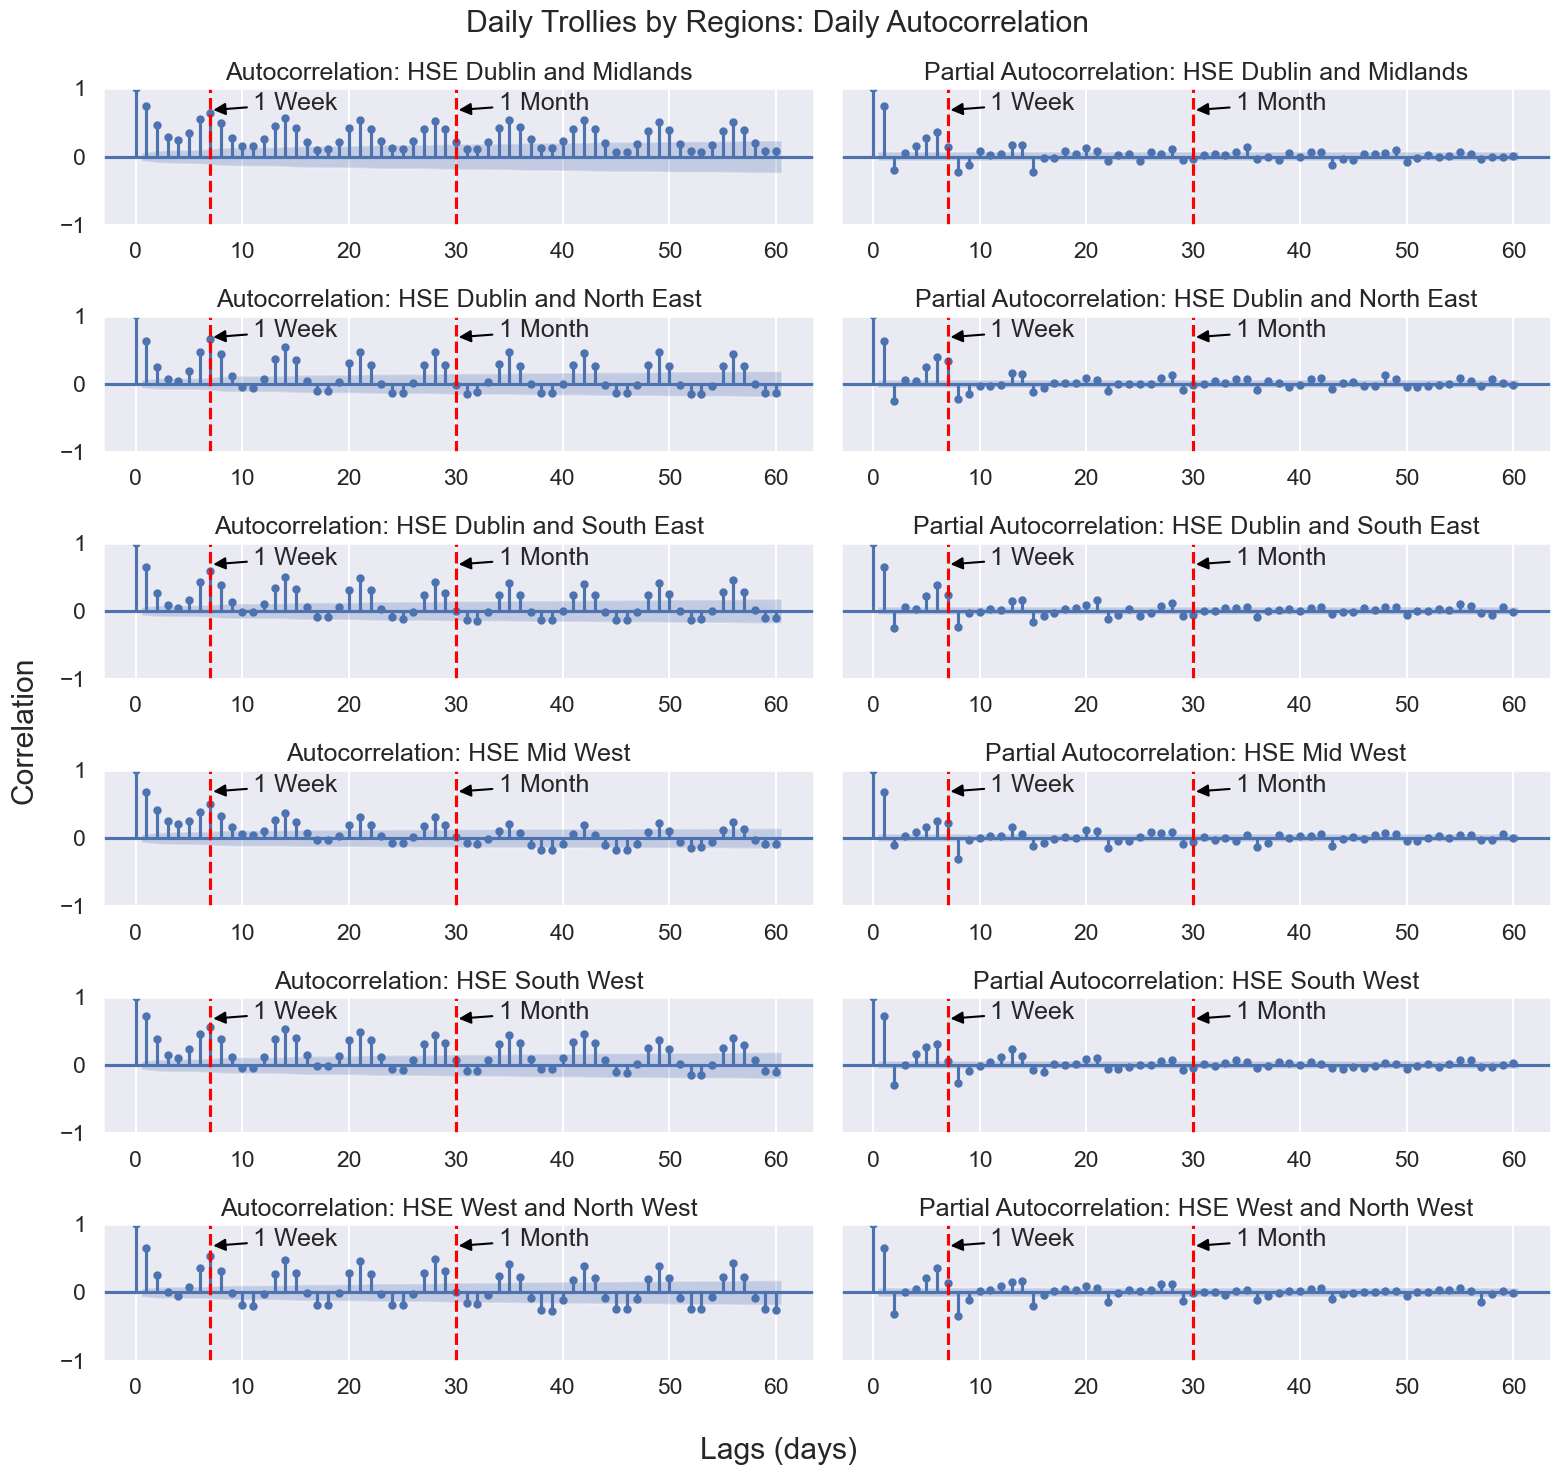

In [34]:
# settings
y_loc=.68; x_shift=4
n_lags=60

fig, axes = plt.subplots(daily_df.columns.__len__(), 2, figsize=(16, 15), sharey=True)
for i, (ax, col) in enumerate(zip(axes, daily_df.columns)):

    plot_acf(daily_df[col],  lags=n_lags, ax=ax[0], title=f'Autocorrelation: {col}')
    plot_pacf(daily_df[col], lags=n_lags, ax=ax[1], title=f'Partial Autocorrelation: {col}')

    # annotation lines
    ax[0].axvline(x=7, color='red', linestyle='--')  
    ax[0].axvline(x=30, color='red', linestyle='--') 
    ax[1].axvline(x=7, color='red', linestyle='--')  
    ax[1].axvline(x=30, color='red', linestyle='--') 
    # annotation text
    ax[0].annotate('1 Week',   xy=(7, plt.ylim()[1]*y_loc), xytext=(7  +x_shift, plt.ylim()[1]*y_loc), arrowprops=dict(arrowstyle='-|>', color='black'))
    ax[0].annotate('1 Month',  xy=(30,plt.ylim()[1]*y_loc), xytext=(30 +x_shift, plt.ylim()[1]*y_loc),  arrowprops=dict(arrowstyle='-|>', color='black'))
    ax[1].annotate('1 Week',   xy=(7, plt.ylim()[1]*y_loc), xytext=(7  +x_shift, plt.ylim()[1]*y_loc), arrowprops=dict(arrowstyle='-|>', color='black'))
    ax[1].annotate('1 Month',  xy=(30,plt.ylim()[1]*y_loc), xytext=(30 +x_shift, plt.ylim()[1]*y_loc),  arrowprops=dict(arrowstyle='-|>', color='black'))

fig.suptitle('Daily Trollies by Regions: Daily Autocorrelation')
fig.supxlabel('Lags (days)')
fig.supylabel('Correlation')
plt.tight_layout()


## Autocorrelations (week sums)

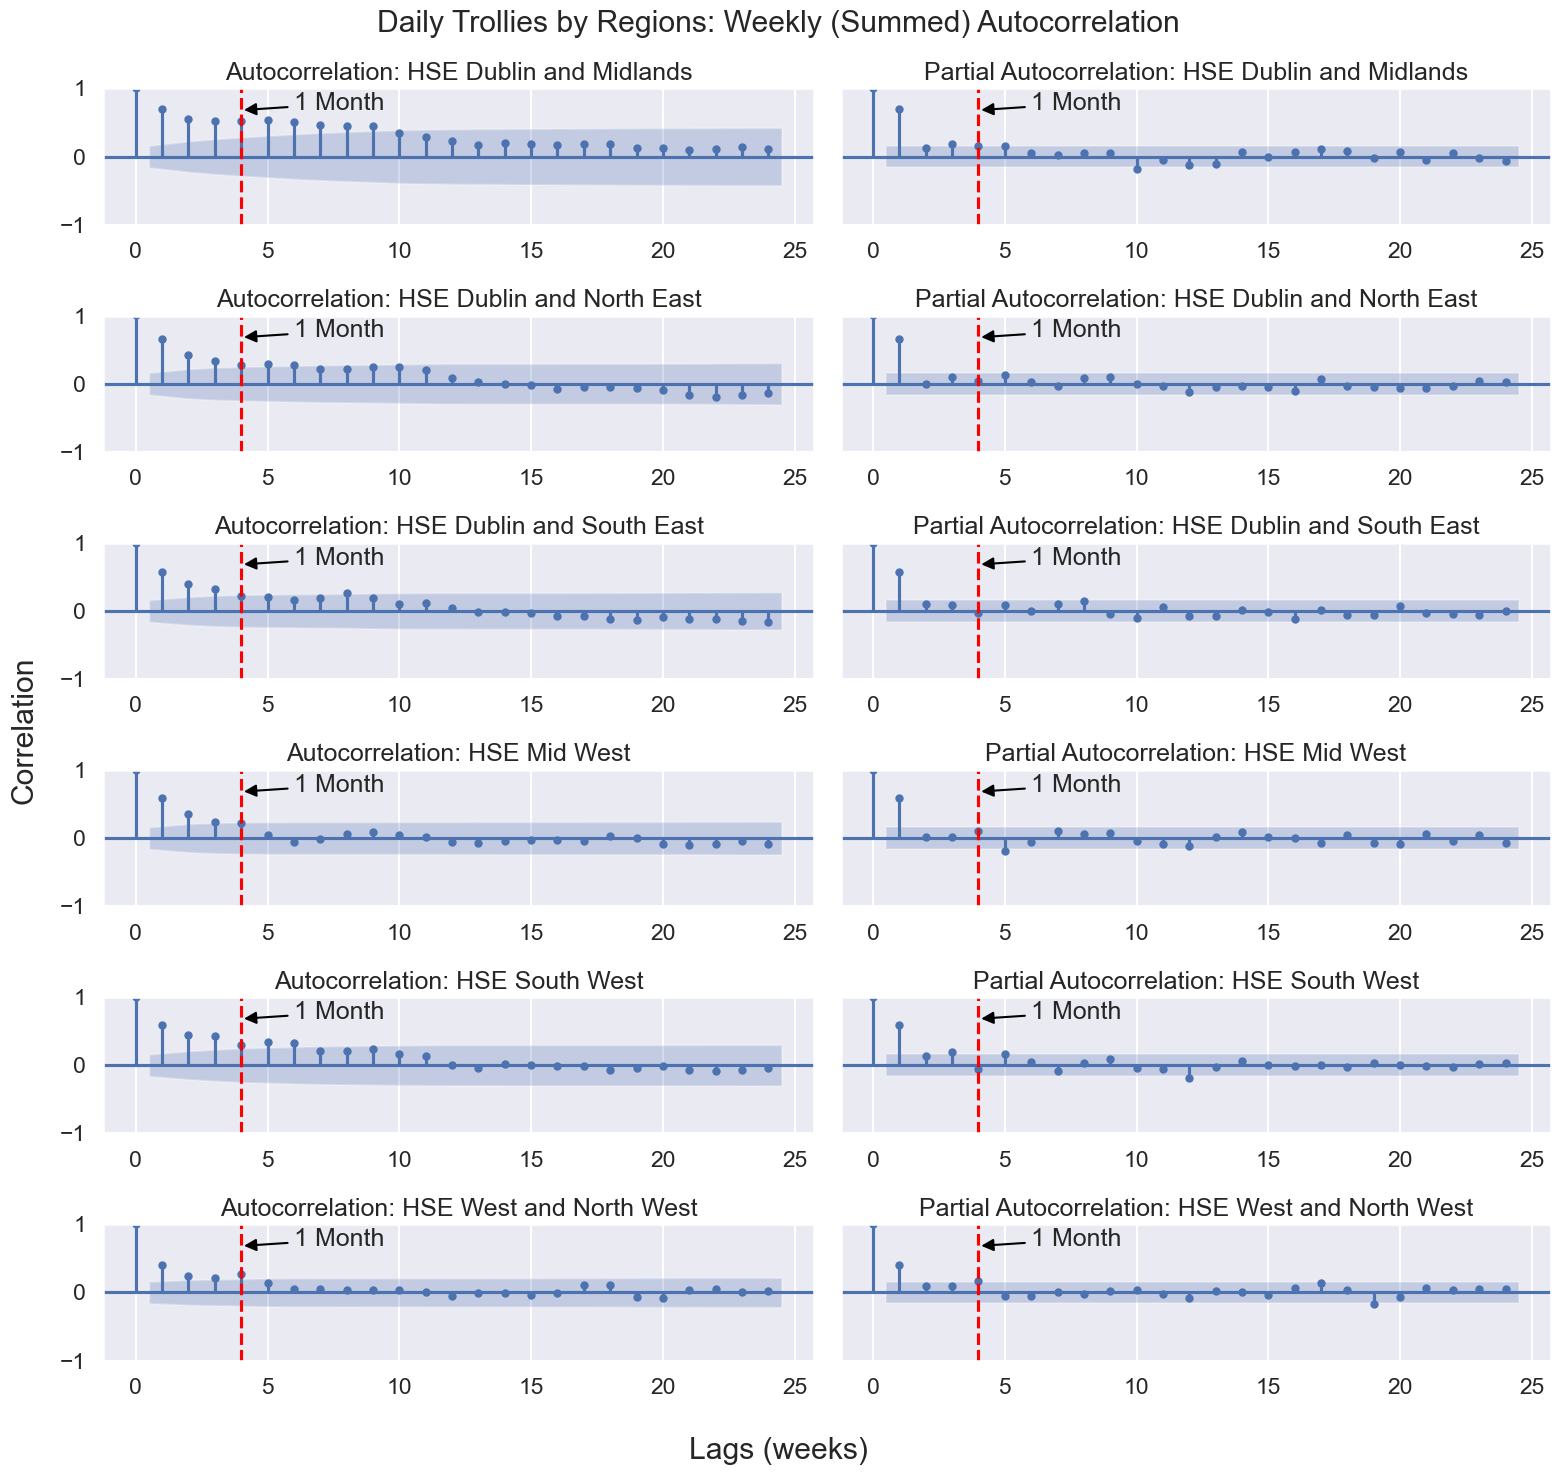

In [32]:
# settings
y_loc=.68; x_shift=2; n_lags=24

fig, axes = plt.subplots(weekly_df.columns.__len__(), 2, figsize=(16, 15), sharey=True)
for i, (ax, col) in enumerate(zip(axes, weekly_df.columns)):

    plot_acf(weekly_df[col],  lags=n_lags, ax=ax[0], title=f'Autocorrelation: {col}')
    plot_pacf(weekly_df[col], lags=n_lags, ax=ax[1], title=f'Partial Autocorrelation: {col}')

    # annotation lines
    ax[0].axvline(x=4, color='red', linestyle='--')  
    ax[1].axvline(x=4, color='red', linestyle='--')  
    # annotation text
    ax[0].annotate('1 Month', xy=(4, plt.ylim()[1]*y_loc), xytext=(4 +x_shift, plt.ylim()[1]*y_loc), arrowprops=dict(arrowstyle='-|>', color='black'))
    ax[1].annotate('1 Month', xy=(4, plt.ylim()[1]*y_loc), xytext=(4 +x_shift, plt.ylim()[1]*y_loc), arrowprops=dict(arrowstyle='-|>', color='black'))

fig.suptitle('Daily Trollies by Regions: Weekly (Summed) Autocorrelation')
fig.supxlabel('Lags (weeks)')
fig.supylabel('Correlation')
plt.tight_layout()
